# Data Science Intern - Assignment

### The Dataset contains information and numbers of over 20000 Chess games played on Lichess.com. Understand the data and approach for the following:

1. Provide insights on the data such as:
- General trends of ‘White’ players with respect to ‘Black’ players
- Any trend of winners with respect to turns and match time?
- Go to openings with respect to rank and color.
Provide additional relevant insights that portray information regarding the
overall player population on Lichess. Go for quality insights over quantity
insights.
2. Using the opening moves, opening styles, color, and other features, Is it
possible to predict

In [1]:
#importing required libraries.

import pandas as pd
import numpy  as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#importing the data set and shape of dataset.
data=pd.read_csv('games.csv', encoding='ascii')
data.shape

(20058, 16)

In [3]:
#dataset 
data.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [5]:
#Describing the dataset and its numerical parameter 
data.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


In [6]:
null_counts = data.isnull().sum()
null_percentages = data.isnull().sum() / len(data) * 100
data_types = data.dtypes

null_summary = pd.concat([null_counts, null_percentages, data_types], axis=1)
null_summary.columns = ['Null Count', 'Null Percentage', 'Data Type']

print(null_summary)

                Null Count  Null Percentage Data Type
id                       0              0.0    object
rated                    0              0.0      bool
created_at               0              0.0   float64
last_move_at             0              0.0   float64
turns                    0              0.0     int64
victory_status           0              0.0    object
winner                   0              0.0    object
increment_code           0              0.0    object
white_id                 0              0.0    object
white_rating             0              0.0     int64
black_id                 0              0.0    object
black_rating             0              0.0     int64
moves                    0              0.0    object
opening_eco              0              0.0    object
opening_name             0              0.0    object
opening_ply              0              0.0     int64


No Null Value is present 

In [7]:
data['victory_status'] = data['victory_status'].astype('category')
data['winner'] = data['winner'].astype('category')
data['opening_name'] = data['opening_name'].astype('category')
data['opening_ply'] = data['opening_ply'].astype('int')
data['rated'] = data['rated'].astype('int')

## Changing decimal value to date time format 

In [8]:
def convert_to_datetime(column):
    # Convert scientific notation values to decimal values
    decimal_values = column.apply(lambda x: float(x))
    
    # Convert decimal values to strings and then to datetime objects
    datetime_column = pd.to_datetime(decimal_values.astype(int).astype(str), format='%Y%m%d')
    
    return datetime_column

In [9]:
import pandas as pd

def convert_milliseconds_to_datetime(column):
    # Convert milliseconds to seconds and then to datetime objects
    datetime_column = pd.to_datetime(column.astype(int) // 1000, unit='s')
    
    return datetime_column

# Convert 'last_move_at' column to datetime objects
data['created_at'] = convert_milliseconds_to_datetime(data['created_at'])
data['last_move_at'] = convert_milliseconds_to_datetime(data['last_move_at'])


In [10]:
data.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,0,2017-08-31 20:06:40,2017-08-31 20:06:40,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,1,2017-08-30 21:53:20,2017-08-30 21:53:20,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,1,2017-08-30 21:53:20,2017-08-30 21:53:20,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,1,2017-08-30 16:20:00,2017-08-30 16:20:00,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,1,2017-08-29 18:06:40,2017-08-29 18:06:40,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [11]:
# Managing Datetime and extracting month, day, and hour data
for i in ['created_at', 'last_move_at']:
    data[i] = pd.to_datetime(data[i])
    data['{}_month'.format(i)] = data[i].dt.month
    data['{}_day_name'.format(i)] = data[i].dt.day_name()
    data['{}_hour'.format(i)] = data[i].dt.hour

## Univatriate and Bivariate analysis

In [12]:
value_counts_dict = {}

for column in data.columns:
    value_counts_dict[column] = data[column].value_counts().nunique()


for column, value_counts in value_counts_dict.items():
    print(f"Value counts for column '{column}':")
    print(value_counts)
    print("-----------------------------------------------------------------") 

Value counts for column 'id':
5
-----------------------------------------------------------------
Value counts for column 'rated':
2
-----------------------------------------------------------------
Value counts for column 'created_at':
35
-----------------------------------------------------------------
Value counts for column 'last_move_at':
35
-----------------------------------------------------------------
Value counts for column 'turns':
125
-----------------------------------------------------------------
Value counts for column 'victory_status':
4
-----------------------------------------------------------------
Value counts for column 'winner':
3
-----------------------------------------------------------------
Value counts for column 'increment_code':
79
-----------------------------------------------------------------
Value counts for column 'white_id':
42
-----------------------------------------------------------------
Value counts for column 'white_rating':
47
-----------

In [13]:
white_win_rate = (data[data['winner'] == 'white'].shape[0] / data.shape[0]) * 100
black_win_rate = (data[data['winner'] == 'black'].shape[0] / data.shape[0]) * 100

white_average_rating = data['white_rating'].mean()
black_average_rating = data['black_rating'].mean()

victory_status_counts = data.groupby(['victory_status', 'winner']).size().unstack(fill_value=0)

In [14]:
data['id'].unique()

array(['TZJHLljE', 'l1NXvwaE', 'mIICvQHh', ..., 'yrAas0Kj', 'b0v4tRyF',
       'N8G2JHGG'], dtype=object)

In [15]:
data['victory_status'].unique()

['outoftime', 'resign', 'mate', 'draw']
Categories (4, object): ['draw', 'mate', 'outoftime', 'resign']

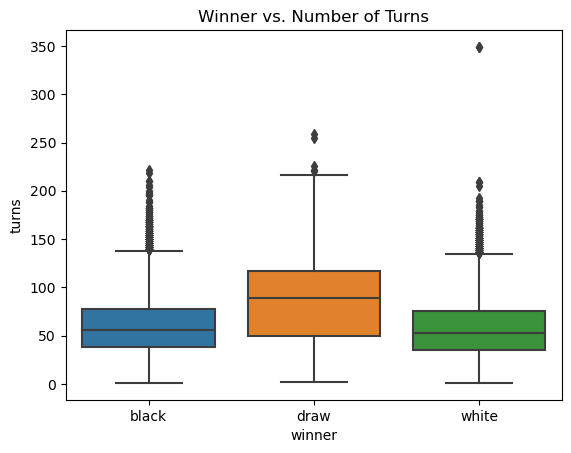

In [16]:
sns.boxplot(x='winner', y='turns', data=data)
plt.title("Winner vs. Number of Turns")
plt.show()

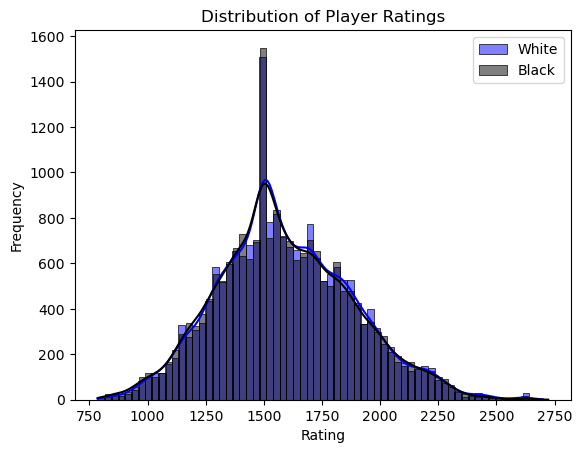

In [17]:
top_openings_by_rank = data.groupby(['white_rating', 'opening_name']).size().nlargest(10)
top_openings_by_color = data.groupby(['winner', 'opening_name']).size().nlargest(10)

sns.histplot(data['white_rating'], kde=True, color='blue', label='White')
sns.histplot(data['black_rating'], kde=True, color='black', label='Black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Player Ratings')
plt.legend()
plt.show()

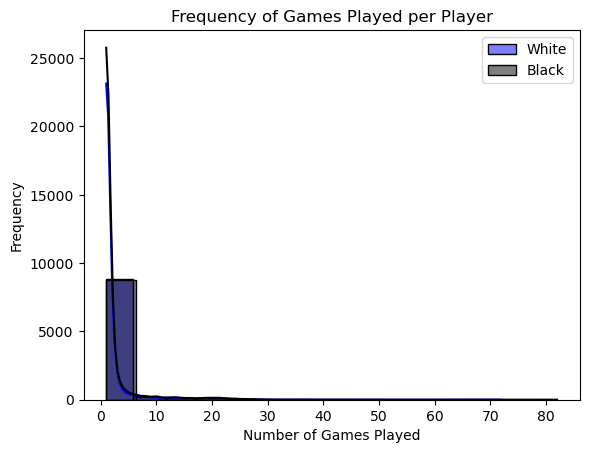

In [18]:
sns.histplot(data['white_id'].value_counts(), kde=True, color='blue', label='White')
sns.histplot(data['black_id'].value_counts(), kde=True, color='black', label='Black')
plt.xlabel('Number of Games Played')
plt.ylabel('Frequency')
plt.title('Frequency of Games Played per Player')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

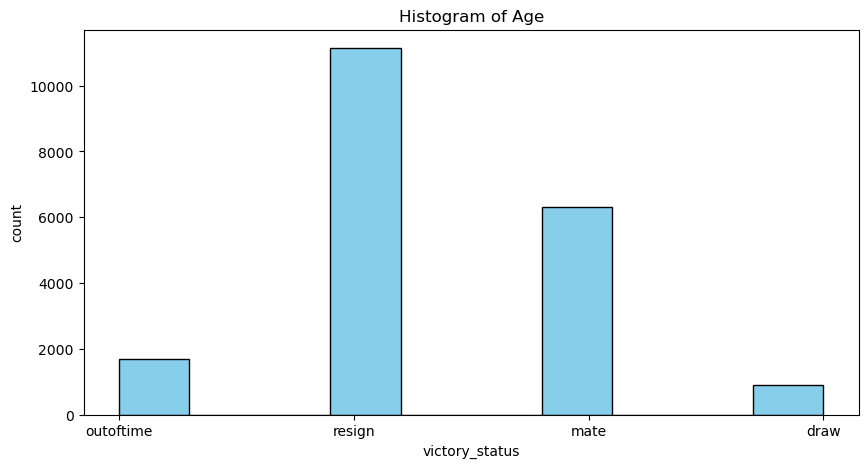

In [19]:
plt.figure(figsize=(10,5))
plt.hist(data['victory_status'],bins=10,color='skyblue', edgecolor='black')
plt.xlabel('victory_status')
plt.ylabel('count')
plt.title('Histogram of Age')
plt.show

In [20]:
data['winner'].unique()

['white', 'black', 'draw']
Categories (3, object): ['black', 'draw', 'white']

<function matplotlib.pyplot.show(close=None, block=None)>

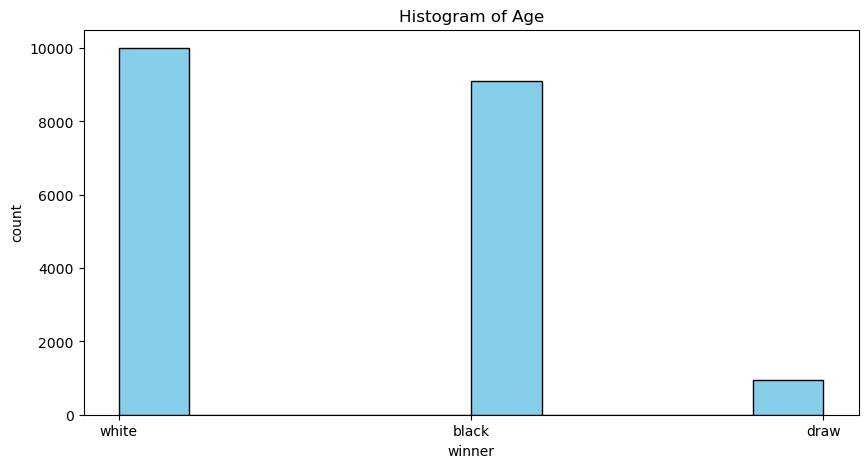

In [21]:
plt.figure(figsize=(10,5))
plt.hist(data['winner'],bins=10,color='skyblue', edgecolor='black')
plt.xlabel('winner')
plt.ylabel('count')
plt.title('Histogram of Age')
plt.show

In [22]:
data['opening_ply'].unique()

array([ 5,  4,  3, 10,  6,  1,  9,  2,  8,  7, 17, 11, 12, 13, 18, 19, 15,
       16, 14, 28, 20, 22, 24])

<function matplotlib.pyplot.show(close=None, block=None)>

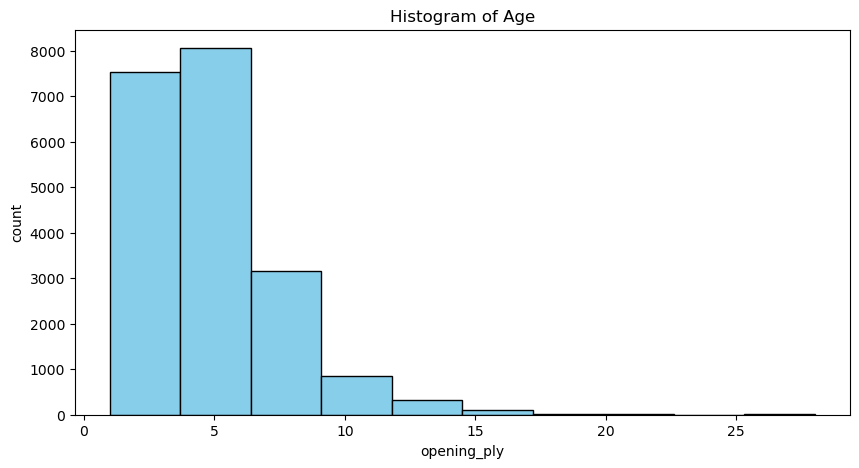

In [23]:
plt.figure(figsize=(10,5))
plt.hist(data['opening_ply'],bins=10,color='skyblue', edgecolor='black')
plt.xlabel('opening_ply')
plt.ylabel('count')
plt.title('Histogram of Age')
plt.show

## Cheaking the outliers  

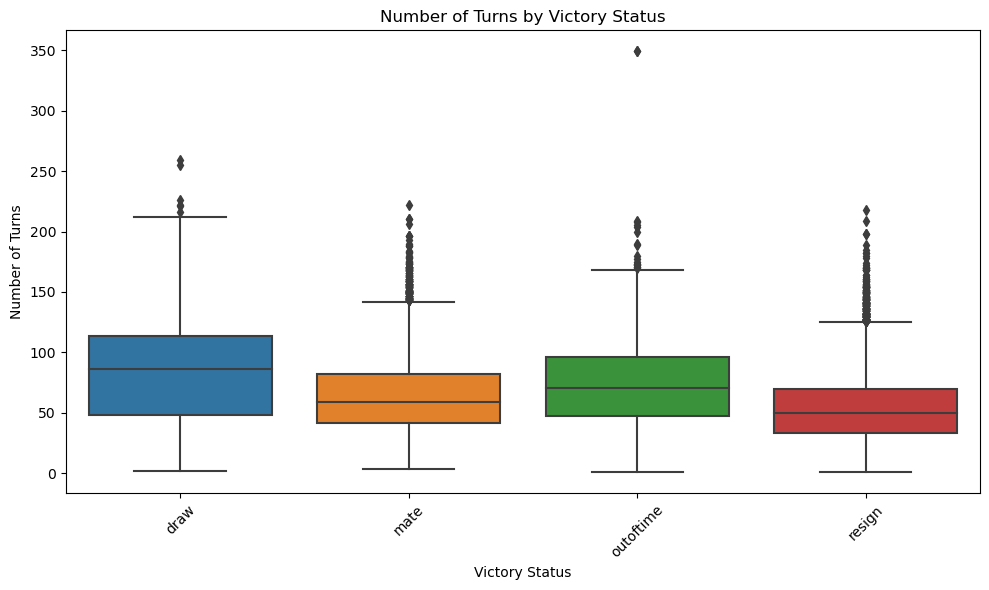

In [24]:
plt.figure(figsize=(10, 6), facecolor='white')
sns.boxplot(x='victory_status', y='turns', data=data)
plt.title('Number of Turns by Victory Status')
plt.xlabel('Victory Status')
plt.ylabel('Number of Turns')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

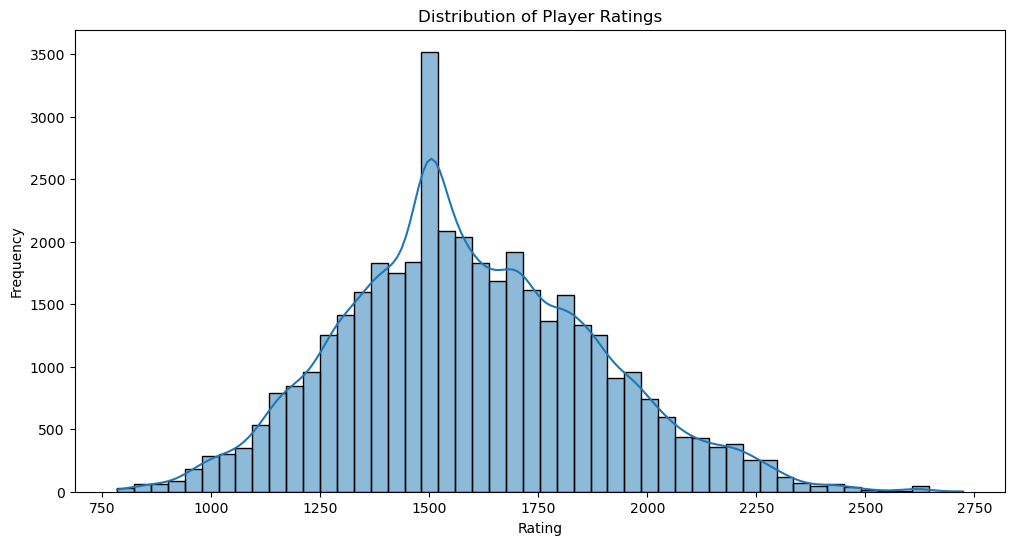

In [25]:
#distribution of ratings for the players in the dataset
plt.figure(figsize=(12, 6), facecolor='white')

# Combine both white and black player ratings into a single series
ratings = pd.concat([data['white_rating'], data['black_rating']])

sns.histplot(ratings, bins=50, kde=True)
plt.title('Distribution of Player Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

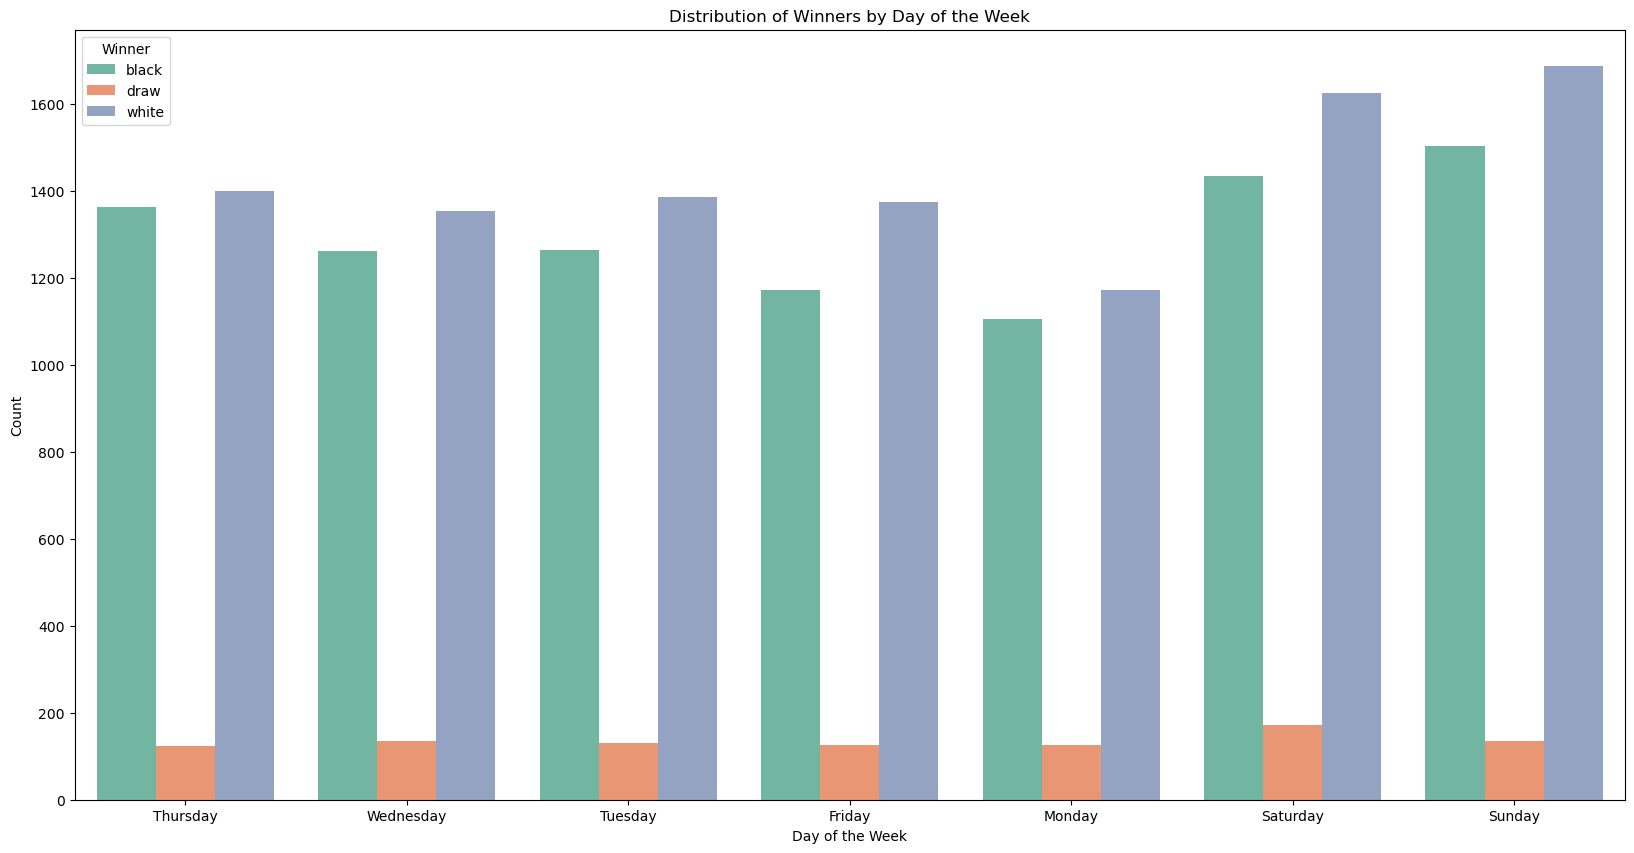

In [26]:
plt.figure(figsize=(20, 10))
sns.countplot(x="created_at_day_name", hue="winner", data=data, palette="Set2")
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Distribution of Winners by Day of the Week')
plt.legend(title='Winner')
plt.show()

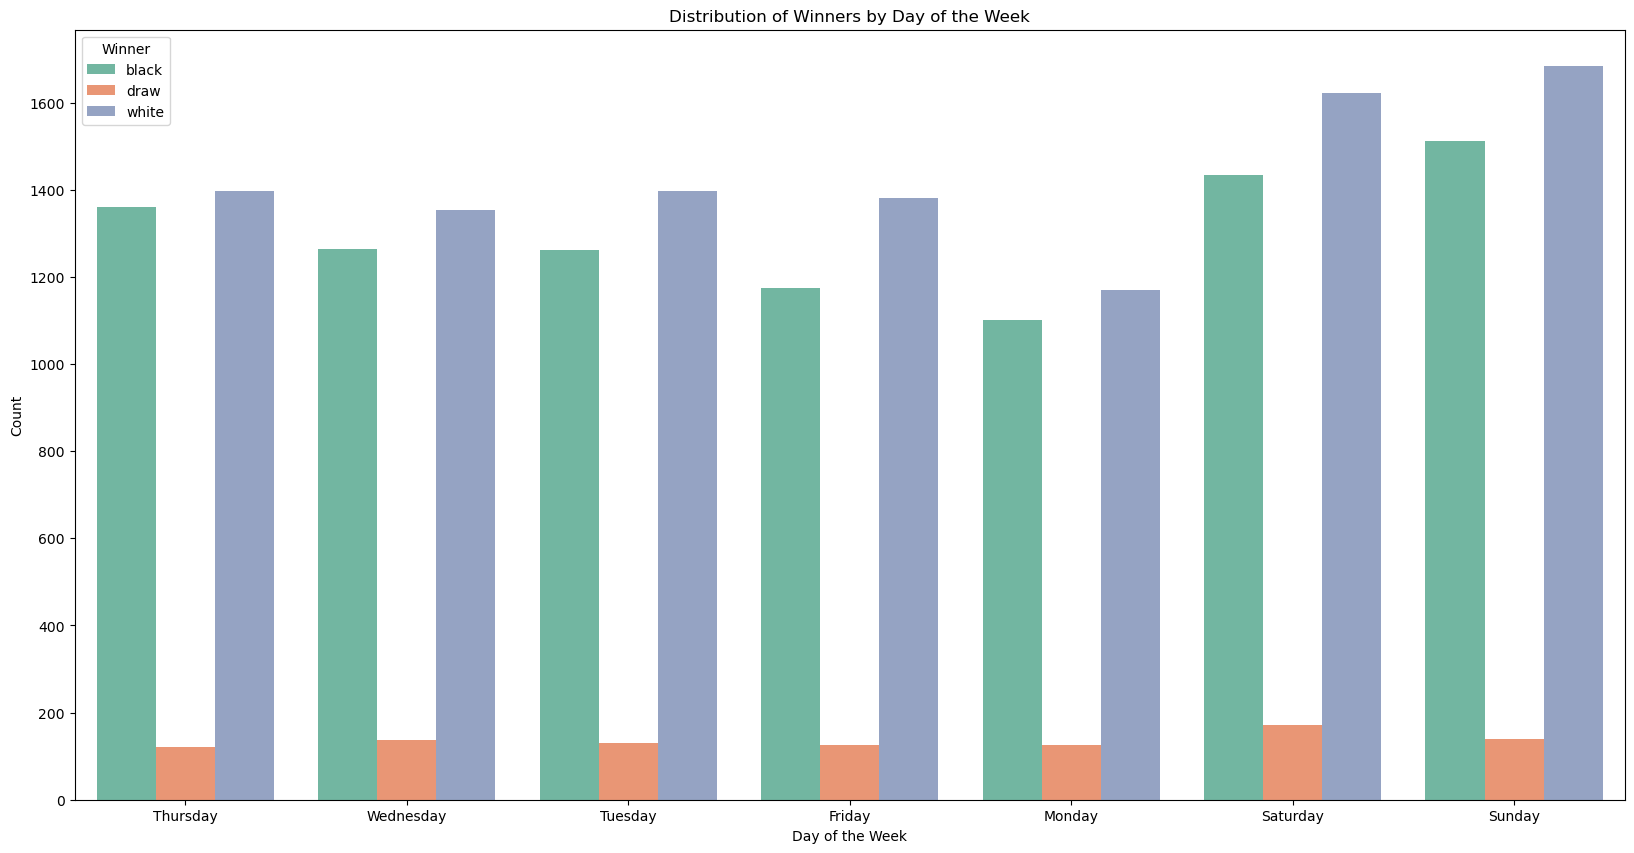

In [27]:
plt.figure(figsize=(20, 10))
sns.countplot(x="last_move_at_day_name", hue="winner", data=data, palette="Set2")
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Distribution of Winners by Day of the Week')
plt.legend(title='Winner')

/var/folders/_z/n55vt86j6xx6nvj6w_wlt5_00000gn/T/ipykernel_1349/3908624449.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(white_ratings, label='White Player Ratings', shade=True)
/var/folders/_z/n55vt86j6xx6nvj6w_wlt5_00000gn/T/ipykernel_1349/3908624449.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(black_ratings, label='Black Player Ratings', shade=True)


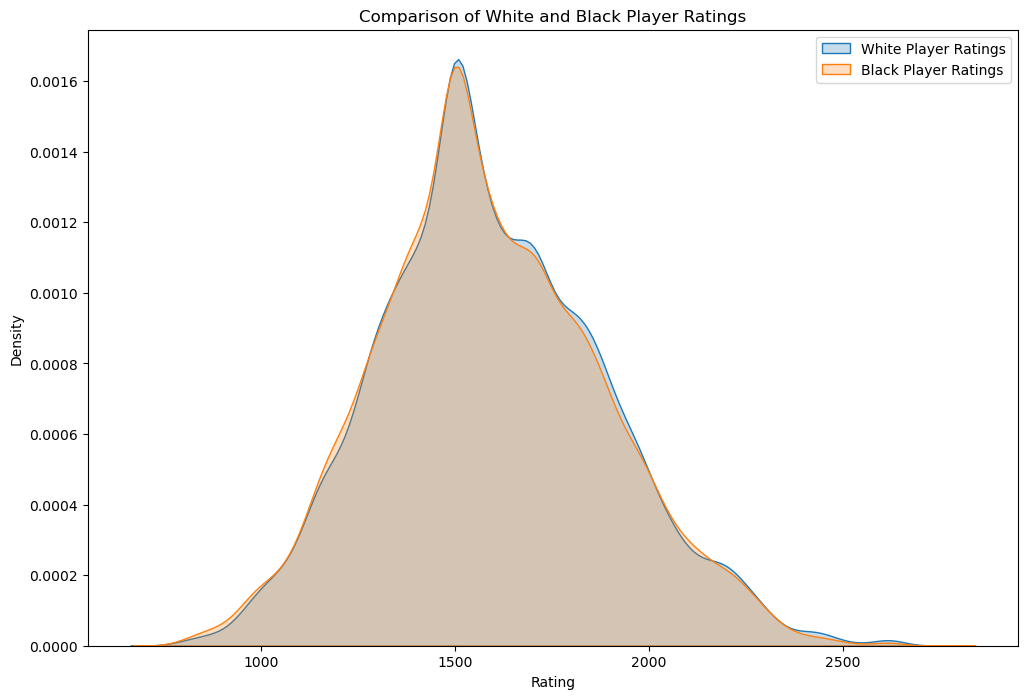

In [28]:
#comparing the distribution of white player ratings to black player ratings
plt.figure(figsize=(12, 8), facecolor='white')

# Create separate data for white and black player ratings
white_ratings = data['white_rating']
black_ratings = data['black_rating']

# Plotting both distributions on the same plot for comparison
sns.kdeplot(white_ratings, label='White Player Ratings', shade=True)
sns.kdeplot(black_ratings, label='Black Player Ratings', shade=True)
plt.title('Comparison of White and Black Player Ratings')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.legend()
plt.show()

In [29]:
# Calculating mean, median, and mode for 'white_rating'
white_mean = data['white_rating'].mean()
white_median = data['white_rating'].median()
white_mode = data['white_rating'].mode()[0]  

# Calculating mean, median, and mode for 'black_rating'
black_mean = data['black_rating'].mean()
black_median = data['black_rating'].median()
black_mode = data['black_rating'].mode()[0]  

# Print the results
print("White Rating:")
print(f"Mean: {white_mean}")
print(f"Median: {white_median}")
print(f"Mode: {white_mode}")
print("\nBlack Rating:")
print(f"Mean: {black_mean}")
print(f"Median: {black_median}")
print(f"Mode: {black_mode}")


White Rating:
Mean: 1596.6318675840064
Median: 1567.0
Mode: 1500

Black Rating:
Mean: 1588.8319872370128
Median: 1562.0
Mode: 1500


In [30]:
#Cheaking the column with numeric Data type 
numerical = data.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes

rated           int64
turns           int64
white_rating    int64
black_rating    int64
opening_ply     int64
dtype: object

In [31]:
Numerical_column=['rated','created_at','last_move_at','turns','white_rating','black_rating','opening_ply']

In [32]:
correlation_matrix = data[Numerical_column].corr()
correlation_matrix

,rated,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
rated,1.000000,-0.001171,-0.001176,0.090698,0.003284,0.032655,-0.001906
created_at,-0.001171,1.000000,1.000000,0.083185,0.116170,0.133316,0.100201
last_move_at,-0.001176,1.000000,1.000000,0.083196,0.116172,0.133318,0.100203
turns,0.090698,0.083185,0.083196,1.000000,0.129753,0.160467,0.055999
white_rating,0.003284,0.116170,0.116172,0.129753,1.000000,0.634171,0.277379
black_rating,0.032655,0.133316,0.133318,0.160467,0.634171,1.000000,0.255396
opening_ply,-0.001906,0.100201,0.100203,0.055999,0.277379,0.255396,1.000000


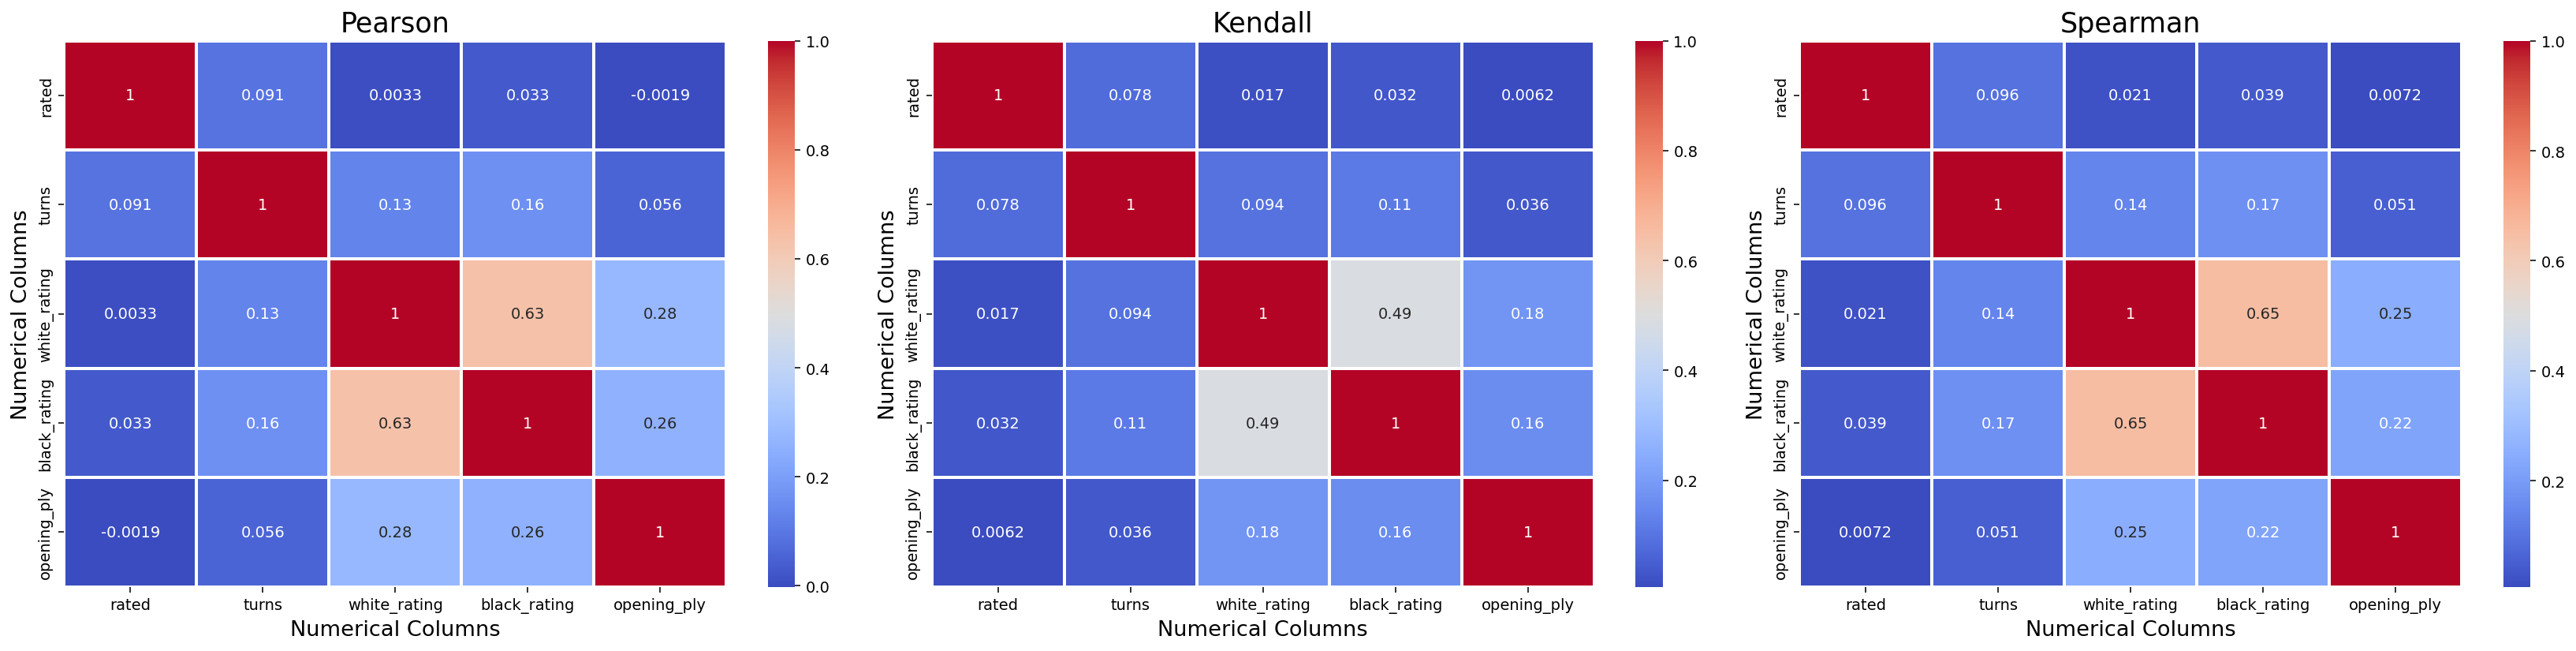

In [33]:
plt.figure(figsize=(24, 6), dpi=140)
methods = ['Pearson', 'Kendall', 'Spearman']
for j, method in enumerate(['pearson', 'kendall', 'spearman']):
    plt.subplot(1, 3, j+1)
    correlation = numerical.dropna().corr(method=method)
    sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=2)
    plt.title(method.capitalize(), fontsize=18)
    plt.xlabel('Numerical Columns', fontsize=14)
    plt.ylabel('Numerical Columns', fontsize=14)

plt.tight_layout()
plt.show()

## Applying label encoding and onehot label encoding 

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     20058 non-null  object        
 1   rated                  20058 non-null  int64         
 2   created_at             20058 non-null  datetime64[ns]
 3   last_move_at           20058 non-null  datetime64[ns]
 4   turns                  20058 non-null  int64         
 5   victory_status         20058 non-null  category      
 6   winner                 20058 non-null  category      
 7   increment_code         20058 non-null  object        
 8   white_id               20058 non-null  object        
 9   white_rating           20058 non-null  int64         
 10  black_id               20058 non-null  object        
 11  black_rating           20058 non-null  int64         
 12  moves                  20058 non-null  object        
 13  o

In [35]:
data.drop('id', axis=1, inplace=True)
data.drop('last_move_at', axis=1, inplace=True)
data.drop('created_at', axis=1, inplace=True)
data.drop('white_id', axis=1, inplace=True)
data.drop('black_id', axis=1, inplace=True)
data.drop('opening_name', axis=1, inplace=True)
data.drop('moves', axis=1, inplace=True)

In [36]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [37]:
data['last_move_at_day_name'] = data['last_move_at_day_name'].map({'Sunday': 0,'Monday': 1,'Tuesday': 2,'Wednesday': 3,'Thursday': 4,'Friday': 5,'Saturday': 6})
data['created_at_day_name'] = data['created_at_day_name'].map({'Sunday': 0,'Monday': 1,'Tuesday': 2,'Wednesday': 3,'Thursday': 4,'Friday': 5,'Saturday': 6})
data['victory_status'] = data['victory_status'].map({'resign': 0,'mate': 1,'outoftime': 2,'draw': 3,})
data['winner'] = data['winner'].map({'white': 0,'black': 1,'draw':2})

In [38]:
data['last_move_at_day_name'] = data['last_move_at_day_name'].astype('int')
data['created_at_day_name'] = data['created_at_day_name'].astype('int')
data['victory_status'] = data['victory_status'].astype('int')
data['winner'] = data['winner'].astype('int')

In [39]:
data.head()

,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_eco,opening_ply,created_at_month,created_at_day_name,created_at_hour,last_move_at_month,last_move_at_day_name,last_move_at_hour
0,0,13,2,0,15+2,1500,1191,D10,5,8,4,20,8,4,20
1,1,16,0,1,5+10,1322,1261,B00,4,8,3,21,8,3,21
2,1,61,1,0,5+10,1496,1500,C20,3,8,3,21,8,3,21
3,1,61,1,0,20+0,1439,1454,D02,3,8,3,16,8,3,16
4,1,95,1,0,30+3,1523,1469,C41,5,8,2,18,8,2,18


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   rated                  20058 non-null  int64 
 1   turns                  20058 non-null  int64 
 2   victory_status         20058 non-null  int64 
 3   winner                 20058 non-null  int64 
 4   increment_code         20058 non-null  object
 5   white_rating           20058 non-null  int64 
 6   black_rating           20058 non-null  int64 
 7   opening_eco            20058 non-null  object
 8   opening_ply            20058 non-null  int64 
 9   created_at_month       20058 non-null  int32 
 10  created_at_day_name    20058 non-null  int64 
 11  created_at_hour        20058 non-null  int32 
 12  last_move_at_month     20058 non-null  int32 
 13  last_move_at_day_name  20058 non-null  int64 
 14  last_move_at_hour      20058 non-null  int32 
dtypes: int32(4), int64(

In [41]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [42]:
encoder= OneHotEncoder()

In [43]:
data_object = data.select_dtypes(include=['object'])

In [44]:
encoded_data = encoder.fit_transform(data_object)

In [45]:
encoded_data_dense = encoded_data.toarray()

In [46]:
category_names = encoder.get_feature_names_out(input_features=data_object.columns)

In [47]:
encoded_df = pd.DataFrame(encoded_data_dense, columns=category_names)

In [48]:
data = data.drop(columns=data_object.columns)

In [49]:
data = pd.concat([data, encoded_df], axis=1)

In [50]:
data.head()

,rated,turns,victory_status,winner,white_rating,black_rating,opening_ply,created_at_month,created_at_day_name,created_at_hour,...,opening_eco_E81,opening_eco_E87,opening_eco_E88,opening_eco_E90,opening_eco_E91,opening_eco_E92,opening_eco_E94,opening_eco_E95,opening_eco_E97,opening_eco_E98
0,0,13,2,0,1500,1191,5,8,4,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,16,0,1,1322,1261,4,8,3,21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,61,1,0,1496,1500,3,8,3,21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,61,1,0,1439,1454,3,8,3,16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,95,1,0,1523,1469,5,8,2,18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Splitting the Dataset

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [52]:
#Importing Required libraries to train the model 
from sklearn.ensemble import RandomForestRegressor

In [53]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [54]:
x=data.drop(["winner"],axis=1)
y=data["winner"]

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=55)

In [56]:
print('x_train =',x_train.shape)
print('y_train =',y_train.shape)
print('x_test =',x_test.shape)
print('y_test =',y_test.shape)

x_train = (16046, 777)
y_train = (16046,)
x_test = (4012, 777)
y_test = (4012,)


In [57]:
sc=StandardScaler()
sc.fit(x_train)

x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

## Model Evaluation

In [58]:
def evaluate_random_forest(x_train, y_train, x_test, y_test):
    model = RandomForestRegressor()

    # Model Training
    model.fit(x_train, y_train)

    # Cross-validation
    cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='r2')
    cv_mean_score = np.mean(cv_scores)

    # Model Prediction
    y_pred = model.predict(x_test)

    # Evaluation
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results = {
        'Cross-Validation Mean R2 Score': cv_mean_score,
        'Mean Squared Error (MSE)': mse,
        'R-squared (R2) Score': r2
    }

    return results

results = evaluate_random_forest(x_train, y_train, x_test, y_test)

# Print results for Random Forest model
print("Random Forest Model:")
print(f"Cross-Validation Mean R2 Score: {results['Cross-Validation Mean R2 Score']}")
print(f"Mean Squared Error (MSE): {results['Mean Squared Error (MSE)']}")
print(f"R-squared (R2) Score: {results['R-squared (R2) Score']}")


Random Forest Model:
Cross-Validation Mean R2 Score: 0.4137088892864396
Mean Squared Error (MSE): 0.1970756480558325
R-squared (R2) Score: 0.4201986707638228


In [59]:
from sklearn.tree import DecisionTreeRegressor

In [60]:
def evaluate_decision_tree(x_train, y_train, x_test, y_test):
    model = DecisionTreeRegressor()

    # Model Training
    model.fit(x_train, y_train)

    # Cross-validation
    cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='r2')
    cv_mean_score = np.mean(cv_scores)

    # Model Prediction
    y_pred = model.predict(x_test)

    # Evaluation
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results = {
        'Cross-Validation Mean R2 Score': cv_mean_score,
        'Mean Squared Error (MSE)': mse,
        'R-squared (R2) Score': r2
    }

    return results

results = evaluate_decision_tree(x_train, y_train, x_test, y_test)

# Print results for Decision Tree model
print("Decision Tree Model:")
print(f"Cross-Validation Mean R2 Score: {results['Cross-Validation Mean R2 Score']}")
print(f"Mean Squared Error (MSE): {results['Mean Squared Error (MSE)']}")
print(f"R-squared (R2) Score: {results['R-squared (R2) Score']}")

Decision Tree Model:
Cross-Validation Mean R2 Score: -0.06756436833963404
Mean Squared Error (MSE): 0.3601694915254237
R-squared (R2) Score: -0.05962736642934763
